In [ ]:
from google.colab import drive
!pip install ultralytics
import os
import cv2
import glob
from IPython.display import Image, display
import matplotlib.pyplot as plt
import yaml
from PIL import Image
from ultralytics import YOLO
import shutil
import numpy as np
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.5/709.5 kB 13.2 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import locale
print(locale.getpreferredencoding())

import locale
def getpreferredencoding(do_setlocale = True):
 return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Feb 10 16:16:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

## ***Training***

In [ ]:
##accident train
model.train(data="/content/gdrive/MyDrive/Car Crash Detection.v1i.yolov8/data.yaml", epochs=150 ,imgsz=224, plots=True)  # train the model

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/MyDrive/Car Crash Detection.v1i.yolov8/data.yaml, epochs=150, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

train: Scanning /content/gdrive/MyDrive/Car Crash Detection.v1i.yolov8/train/labels.cache... 633 images, 10 backgrounds, 0 corrupt: 100%|██████████| 643/643 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/gdrive/MyDrive/Car Crash Detection.v1i.yolov8/valid/labels.cache... 181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 181/181 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.04G     0.8498     0.4512      1.014          2        224: 100%|██████████| 41/41 [00:15<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.19it/s]

                   all        181        181      0.976      0.923      0.953      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      1.69G     0.9016     0.5026      1.021          6        224: 100%|██████████| 41/41 [00:09<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]

                   all        181        181      0.951      0.873      0.908       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.69G       1.02     0.5805      1.055          3        224: 100%|██████████| 41/41 [00:09<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 1/6 [00:00<00:01,  3.32it/s]


KeyboardInterrupt: 

In [ ]:
##congestion train
model.train(data="/content/gdrive/MyDrive/Traffic.v5i.yolov8/data.yaml", epochs=150 ,imgsz=224, plots=True)  # train the model

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/MyDrive/Traffic.v5i.yolov8/data.yaml, epochs=150, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

train: Scanning /content/gdrive/MyDrive/Traffic.v5i.yolov8/train/labels.cache... 873 images, 0 backgrounds, 0 corrupt: 100%|██████████| 873/873 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/gdrive/MyDrive/Traffic.v5i.yolov8/valid/labels.cache... 265 images, 0 backgrounds, 0 corrupt: 100%|██████████| 265/265 [00:00<?, ?it/s]
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x798af66aacb0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1442, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.10/selectors.py", line 416, in select
    fd_ev

Plotting labels to runs/detect/train32/labels.jpg... 

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)


KeyboardInterrupt: 

In [ ]:
##save all the results
!cp -r "/content/runs" "/content/gdrive/MyDrive"

## ***Validation***

In [ ]:
!yolo task=detect \
mode=val \
model='/content/gdrive/MyDrive/runs/detect/train3/weights/best.pt' \
data="/content/gdrive/MyDrive/Traffic.v5i.yolov8/data.yaml" split=val

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/gdrive/MyDrive/Traffic.v5i.yolov8/valid/labels.cache... 265 images, 0 backgrounds, 0 corrupt: 100% 265/265 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:18<00:00,  1.08s/it]
                   all        265       3079       0.82      0.681      0.726      0.481
                   car        265       2902      0.943      0.819      0.899      0.714
             motorbike        265        177      0.696      0.542      0.552      0.248
Speed: 0.3ms preprocess, 6.9ms inference, 0.0ms loss, 10.6ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect \
mode=val \
model='/content/gdrive/MyDrive/runs/detect/train/weights/best.pt' \
data="/content/gdrive/MyDrive/Car Crash Detection.v1i.yolov8/data.yaml" split=val

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/gdrive/MyDrive/Car Crash Detection.v1i.yolov8/valid/labels.cache... 181 images, 0 backgrounds, 0 corrupt: 100% 181/181 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:05<00:00,  2.27it/s]
                   all        181        181      0.972      0.956      0.974       0.69
Speed: 0.4ms preprocess, 7.7ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


## **Testing**

In [ ]:
!yolo task=detect mode=val model='/content/gdrive/MyDrive/runs/detect/train3/weights/best.pt' data="/content/gdrive/MyDrive/Traffic.v5i.yolov8/data.yaml" classes=[0] split=test

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/gdrive/MyDrive/Traffic.v5i.yolov8/test/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100% 123/123 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:18<00:00,  2.31s/it]
                   all        123       1469      0.933      0.831      0.903      0.709
                   car        123       1469      0.933      0.831      0.903      0.709
Speed: 0.2ms preprocess, 15.8ms inference, 0.0ms loss, 14.4ms postprocess per image
Results saved to runs/detect/val8
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val model='/content/gdrive/MyDrive/runs/detect/train/weights/best.pt' data="/content/gdrive/MyDrive/Car Crash Detection.v1i.yolov8/data.yaml" split=test

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/gdrive/MyDrive/Car Crash Detection.v1i.yolov8/test/labels.cache... 91 images, 10 backgrounds, 0 corrupt: 100% 101/101 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:11<00:00,  1.71s/it]
                   all        101         91      0.878      0.967      0.904      0.643
Speed: 0.1ms preprocess, 8.7ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to runs/detect/val9
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
##save all the results
!cp -r "/content/runs" "/content/gdrive/MyDrive"

## **Dataset ploting**

In [ ]:
# Construct the path to the best model weights file using os.path.join
best_Con_model_path = os.path.join('/content/gdrive/MyDrive/runs/detect/train3/weights/best.pt')
# Load the best model weights into the YOLO model
best_Con_model = YOLO(best_Con_model_path)

In [ ]:
best_Acc_model_path = os.path.join('/content/gdrive/MyDrive/runs/detect/train/weights/best.pt')
best_Acc_model = YOLO(best_Acc_model_path)


0: 224x224 1 crash, 14.4ms
Speed: 1.1ms preprocess, 14.4ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 224)


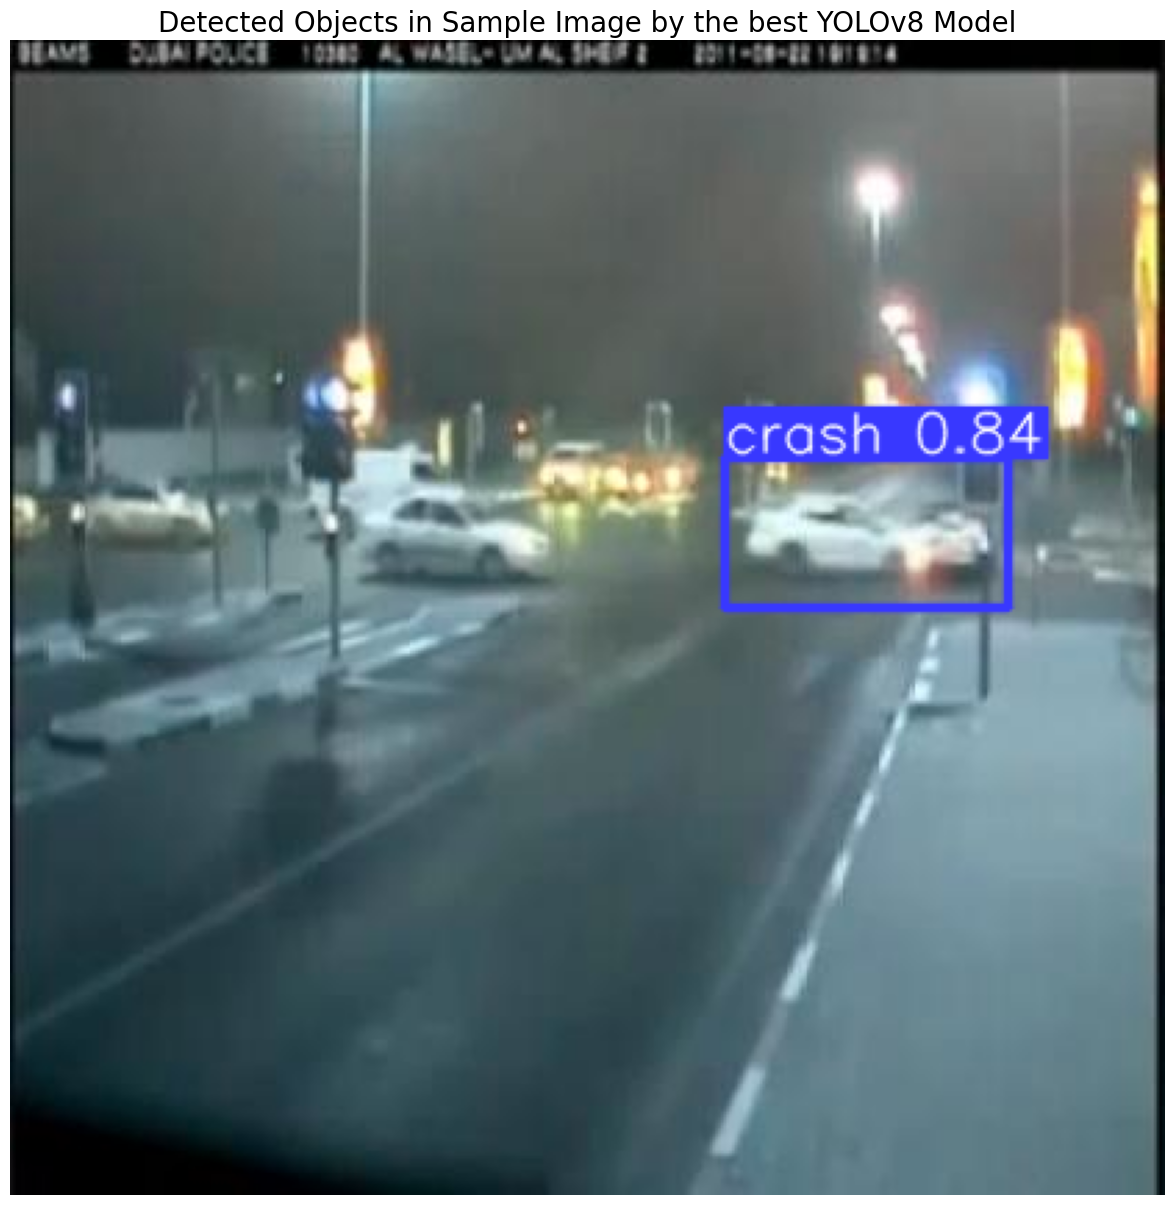

In [ ]:
TestImage = Image.open(open("/content/gdrive/MyDrive/Car Crash Detection.v1i.yolov8/test/images/frame111_png.rf.44f2413c50309098b65a2fe04064a974.jpg", 'rb'))
# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
TestImage = best_Acc_model(TestImage)
# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(TestImage[0].plot(line_width=2))
plt.title('Detected Objects in Sample Image by the best YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()


0: 128x224 12 cars, 12.9ms
Speed: 1.2ms preprocess, 12.9ms inference, 1.9ms postprocess per image at shape (1, 3, 128, 224)


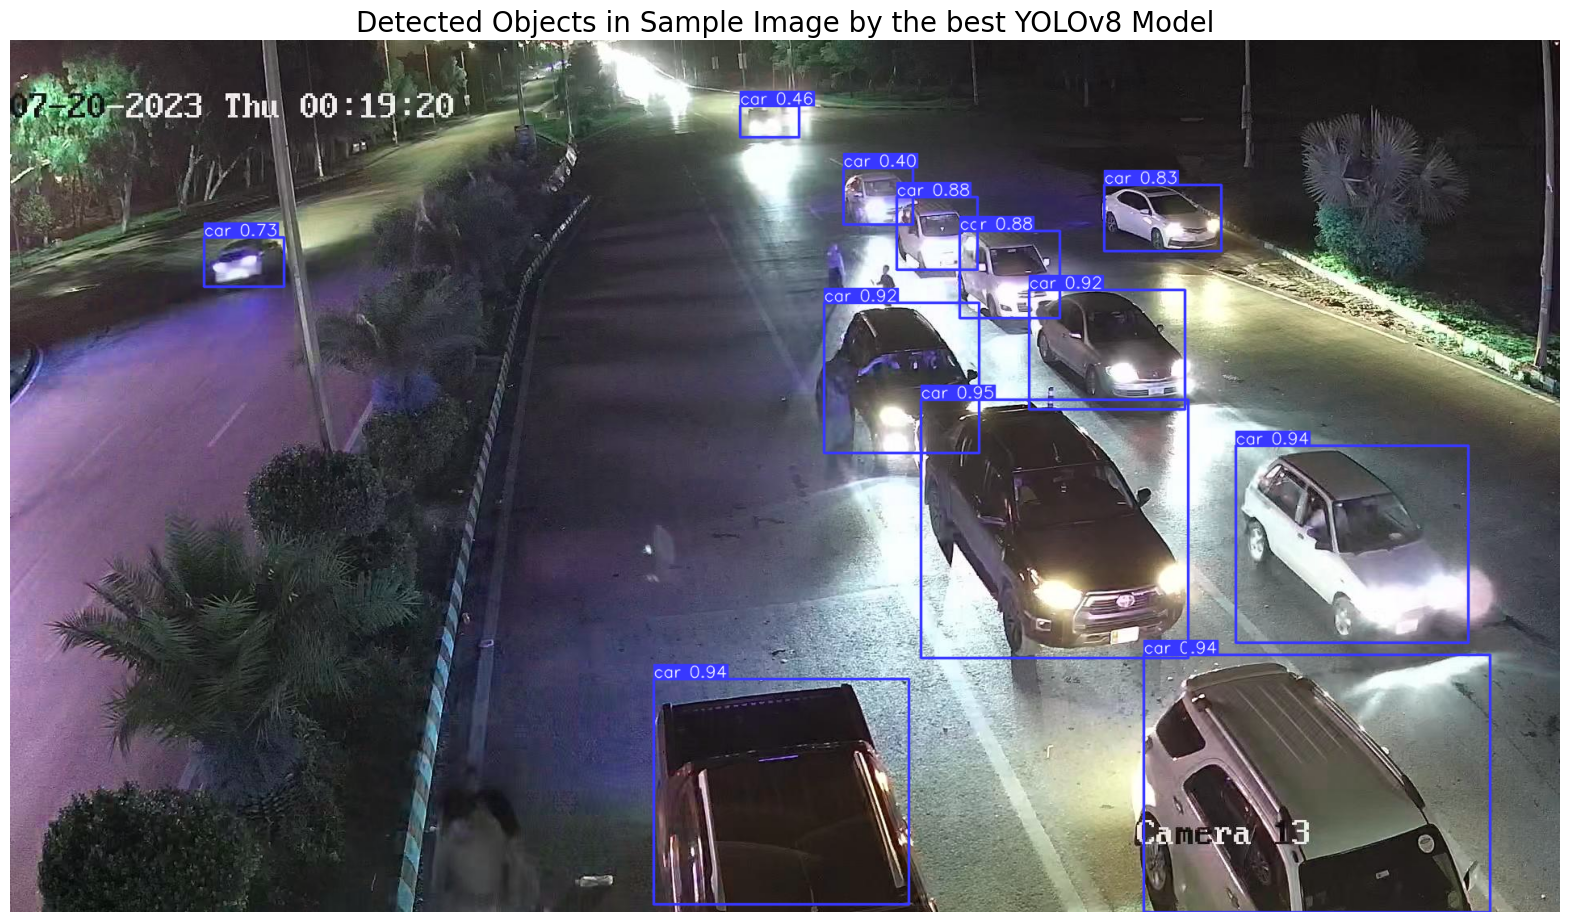

In [ ]:
TestImage = Image.open(open("/content/gdrive/MyDrive/Traffic.v5i.yolov8/test/images/img_2602_jpg.rf.4541c5658686e071e97e2060e095a762.jpg", 'rb'))
# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
TestImage = best_Con_model(TestImage)
# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(TestImage[0].plot(line_width=2))
plt.title('Detected Objects in Sample Image by the best YOLOv8 Model', fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
heavy_traffic_threshold = 10 #num of cars
# Define the positions for the text on the image
text_position = (10, 50)
intensity_position = (10, 100)

# Define font, scale, and colors for the annotations
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 255, 255)    # White color for text
background_color = (0, 0, 255)  # Red background for text

In [ ]:
def Numcounter(img):
  processed_img = best_Con_model(img)
  img=processed_img[0].plot(line_width=2)
        # Retrieve the bounding boxes from the results
  bounding_boxes = processed_img[0].boxes
        # Initialize counters for vehicles in each lane
  number_of_vehicles = 0
          # Loop through each bounding box to count vehicles in each lane
  for box in bounding_boxes.xyxy:
    number_of_vehicles += 1

        # Determine the traffic density
  traffic_density = "Low" if number_of_vehicles < 9 else ("Medium" if number_of_vehicles <= 20 else "High")

        # Add a background rectangle for the vehicle count
  cv2.rectangle(img, (text_position[0]-10, text_position[1] - 25),
                      (text_position[0] + 460, text_position[1] + 10), background_color, -1)

        # Add the vehicle count text on top of the rectangle
  cv2.putText(img, f'Num of cars: {number_of_vehicles}', text_position,
                    font, font_scale, font_color, 2, cv2.LINE_AA)

        # Add a background rectangle for traffic intensity
  cv2.rectangle(img, (intensity_position[0]-10, intensity_position[1] - 25),
                      (intensity_position[0] + 460, intensity_position[1] + 10), background_color, -1)

        # Add the traffic intensity text on top of the rectangle
  cv2.putText(img, f'Traffic density: {traffic_density}', intensity_position,
                    font, font_scale, font_color, 2, cv2.LINE_AA)

  from google.colab.patches import cv2_imshow
  cv2_imshow(img)


0: 128x224 22 cars, 26.6ms
Speed: 1.1ms preprocess, 26.6ms inference, 1.9ms postprocess per image at shape (1, 3, 128, 224)


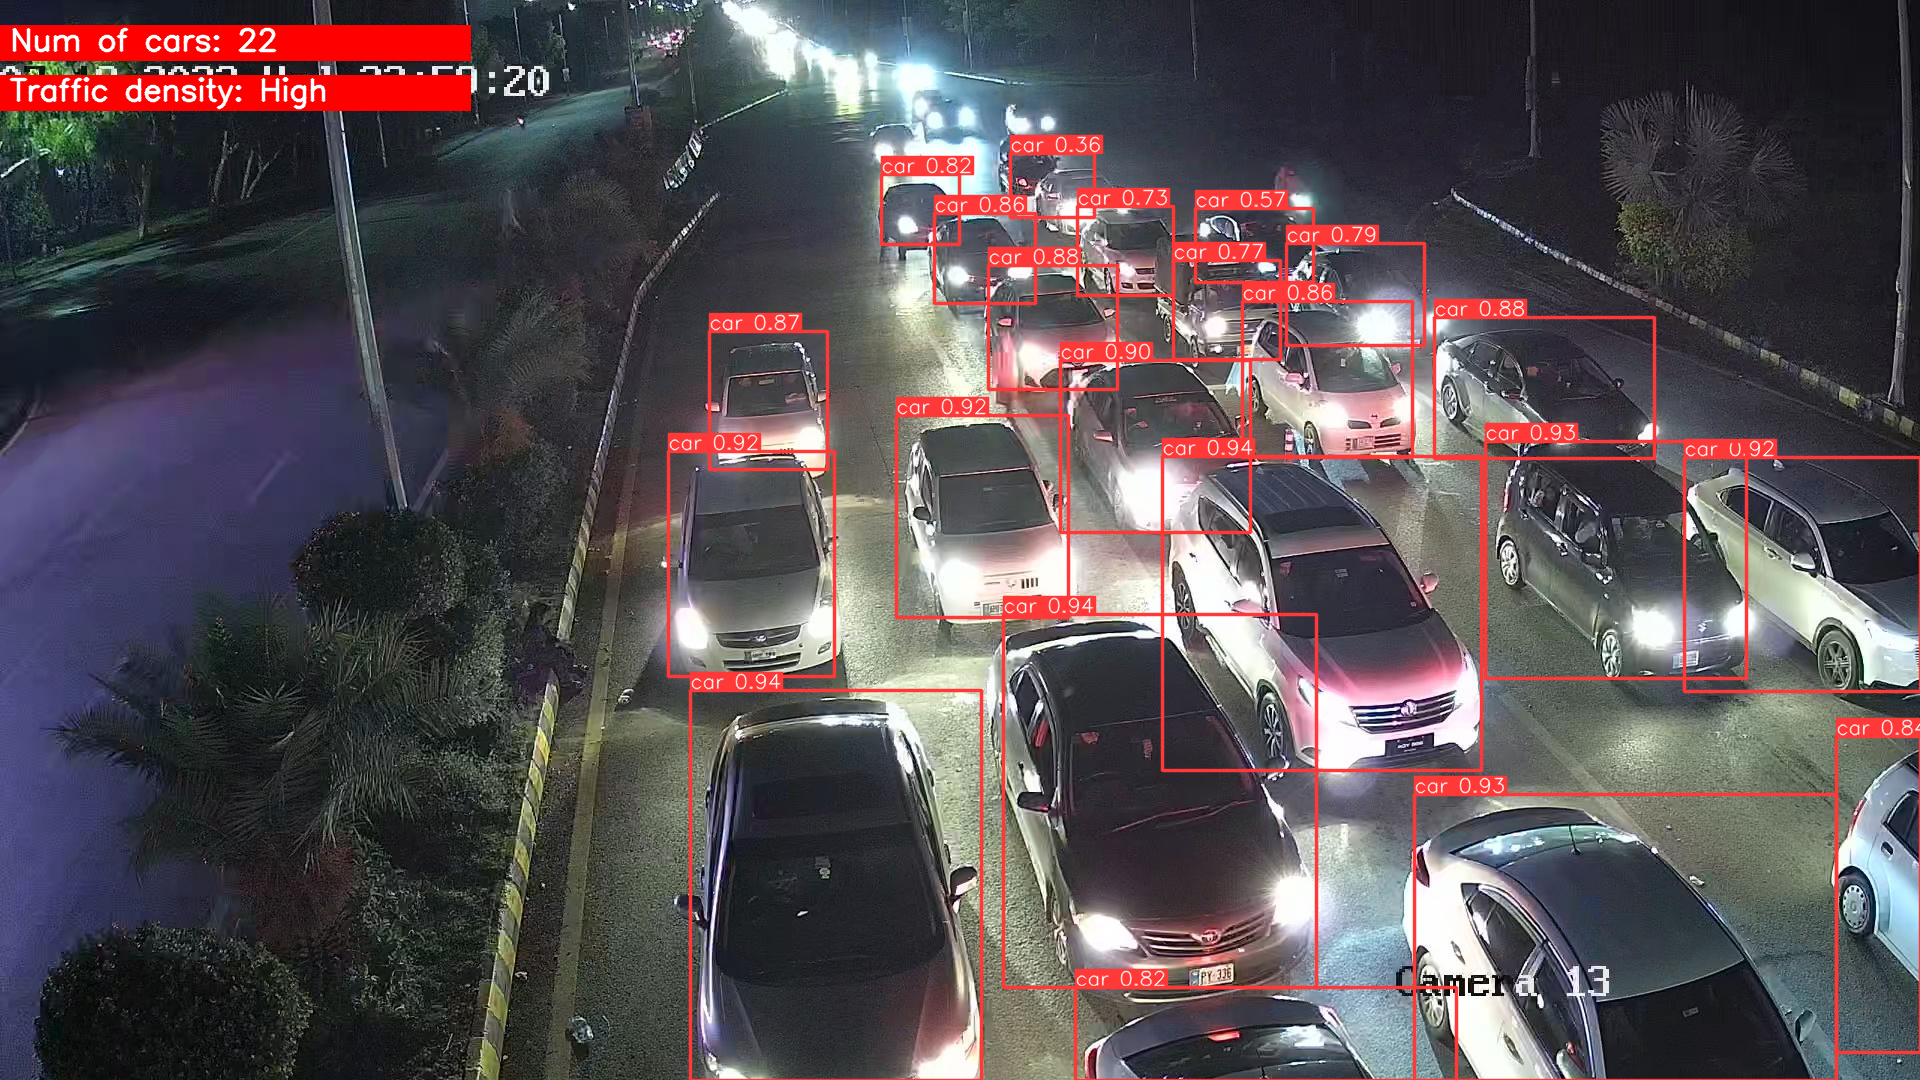

In [ ]:
image= Image.open(open("/content/gdrive/MyDrive/Traffic.v5i.yolov8/test/images/img_1161_jpg.rf.2af21dabaa6c9b92ad10719b99d04bb1.jpg", 'rb'))
# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
Numcounter(image)